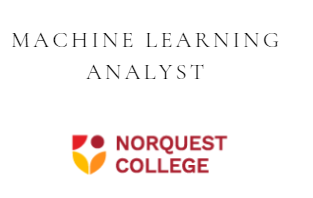

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset for the year 2023
data = pd.read_csv('Islamic_Food_Drive_cleaned_data.csv')
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group
0,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-09-07 3:00,2023-09-07 17:37,Abdulhalim's Hamper,No Special Event,Thursday,Weekday,2023,20-40
1,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07 4:00,2023-11-07 15:59,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40
2,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16 4:00,2023-11-16 17:04,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40
3,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16 3:00,2024-04-17 15:25,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40
4,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-09-12 3:00,2023-09-12 17:39,Sadek's Hamper,No Special Event,Tuesday,Weekday,2023,20-40


In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Extract the hour from the datetime column
data['Pickup_date'] = data['Pickup_date'].dt.date

# Display the updated dataframe
data[['Pickup_date']].head()

,Pickup_date
0,2023-09-07
1,2023-11-07
2,2023-11-16
3,2024-04-17
4,2023-09-12


In [ ]:
import pandas as pd
# Filter data between November 2023 and August 2024 in the pickup date
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-31')

# Convert 'Pickup_date' to Timestamp objects for consistent comparison
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'])

data = data[(data['Pickup_date'] >= start_date) & (data['Pickup_date'] <= end_date)]

# Now, filtered_data contains only the rows where the pickup date falls within the specified range.
print(data.head())


                                             Address  Family_size  \
1       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
2       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
3       14604 77 St NW, Edmonton, AB T5C 1E8, Canada            6   
5  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   
6  403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada            5   

                          Family_id  Status                         client_id  \
1  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
2  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
3  1695130035510x822223160822795600  Active  1694115474357x134699341188431870   
5  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   
6  1695130035707x891534858657611300  Active  1694547419532x515953499649605600   

  collect_scheduled_date Pickup_date                Title     Special_Event  \
1        2023-11-07

In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Extract the hour from the datetime column
data['collect_scheduled_date'] = data['collect_scheduled_date'].dt.date

# Display the updated dataframe
data[['collect_scheduled_date']].head()

<ipython-input-5-c8eea24533c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')
<ipython-input-5-c8eea24533c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['collect_scheduled_date'] = data['collect_scheduled_date'].dt.date


,collect_scheduled_date
1,2023-11-07
2,2023-11-16
3,2024-04-16
5,2023-11-20
6,2023-12-20


In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group
1,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40
2,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40
3,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40
5,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,No Special Event,Monday,Weekday,2023,20-40
6,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,No Special Event,Wednesday,Weekday,2023,20-40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6259 entries, 1 to 6291
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6259 non-null   object        
 1   Family_size             6259 non-null   int64         
 2   Family_id               6259 non-null   object        
 3   Status                  6259 non-null   object        
 4   client_id               6259 non-null   object        
 5   collect_scheduled_date  6259 non-null   object        
 6   Pickup_date             6259 non-null   datetime64[ns]
 7   Title                   6259 non-null   object        
 8   Special_Event           6259 non-null   object        
 9   Day                     6259 non-null   object        
 10  weekend_or_weekday      6259 non-null   object        
 11  Year                    6259 non-null   int64         
 12  Age_group               6259 non-null   object       

In [ ]:
data['Pickup_date'].value_counts()

,count
Pickup_date,
2024-07-03,128
2024-07-22,125
2024-06-27,106
2024-07-02,102
2024-06-03,100
...,...
2024-03-01,1
2024-02-23,1
2024-03-23,1


In [ ]:
unique_dates_count = data['Pickup_date'].nunique()
unique_dates_count

161

In [ ]:
import re

# Function to extract Canadian postal code using regex
def extract_postal_code(address):
   # Handle NoneType values by returning None
    if address is None:
        return None
    match = re.search(r'\b[A-Z]\d[A-Z] ?\d[A-Z]\d\b', str(address))  # Convert address to string
    return match.group() if match else None

# Apply the function to the Address column
data["Address"] = data["Address"].apply(extract_postal_code)

# Display the updated dataframe
data[['Address']].head()

,Address
1,T5C 1E8
2,T5C 1E8
3,T5C 1E8
5,T6W 0G6
6,T6W 0G6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6259 entries, 1 to 6291
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6040 non-null   object        
 1   Family_size             6259 non-null   int64         
 2   Family_id               6259 non-null   object        
 3   Status                  6259 non-null   object        
 4   client_id               6259 non-null   object        
 5   collect_scheduled_date  6259 non-null   object        
 6   Pickup_date             6259 non-null   datetime64[ns]
 7   Title                   6259 non-null   object        
 8   Special_Event           6259 non-null   object        
 9   Day                     6259 non-null   object        
 10  weekend_or_weekday      6259 non-null   object        
 11  Year                    6259 non-null   int64         
 12  Age_group               6259 non-null   object       

In [ ]:
data["Address"].value_counts()

,count
Address,
T5C 0R7,106
T5C 3C9,84
T5H 3G1,67
T5H 2V7,63
T5X 2J3,62
...,...
T5G 2M8,1
T5P 3H5,1
T5X 4G6,1


In [ ]:
# Create a new column 'Number_of_Pickups' that sums up pickups for each unique date
data['Number_of_Pickups'] = data['Pickup_date'].map(data['Pickup_date'].value_counts())

# Drop duplicate rows based on the 'Pickup_date' column to show each date only once
data = data.drop_duplicates(subset=['Pickup_date'])

# Display the result
print(data)

      Address  Family_size                         Family_id  Status  \
1     T5C 1E8            6  1695130035510x822223160822795600  Active   
2     T5C 1E8            6  1695130035510x822223160822795600  Active   
3     T5C 1E8            6  1695130035510x822223160822795600  Active   
5     T6W 0G6            5  1695130035707x891534858657611300  Active   
6     T6W 0G6            5  1695130035707x891534858657611300  Active   
...       ...          ...                               ...     ...   
5715  T6X 0V5            2  1700693258195x477796728909070340  Active   
5716  T6X 0V5            2  1700693258195x477796728909070340  Active   
5717  T6X 0V5            2  1700693258195x477796728909070340  Active   
5921  T5C 3C8            3  1705437641497x883882301638836200  Active   
6084  T5C 0R7            4  1709666822844x978976273960796200  Active   

                             client_id collect_scheduled_date Pickup_date  \
1     1694115474357x134699341188431870             2023-11

In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Number_of_Pickups
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40,14
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40,28
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40,27
5,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,43
6,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,No Special Event,Wednesday,Weekday,2023,20-40,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-02-10,2024-02-23,Food Hamper,No Special Event,Friday,Weekday,2024,40-60,1
5716,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-03-10,2024-03-23,Food Hamper,No Special Event,Saturday,Weekend,2024,40-60,1
5717,T6X 0V5,2,1700693258195x477796728909070340,Active,1700693258195x532208574696521700,2024-04-10,2024-04-19,Food Hamper,No Special Event,Friday,Weekday,2024,40-60,1
5921,T5C 3C8,3,1705437641497x883882301638836200,Active,1705437641497x107661275067842560,2024-06-16,2024-06-14,Food,No Special Event,Friday,Weekday,2024,40-60,2


In [ ]:
data['Family_id'].value_counts()

,count
Family_id,
1695674810374x923789437267869700,8
1695666802742x983394029591330800,8
1695130035979x527032600596733800,7
1695130035733x896330019876458500,7
1699830464931x937276865513536600,6
...,...
1699830474076x522355845850465600,1
1699830488390x243656925608845440,1
1699830467956x956211583901900300,1


In [ ]:
# Drop rows with missing values
data = data.dropna()

In [ ]:
data.head(50)

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Number_of_Pickups
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40,14
2,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,No Special Event,Thursday,Weekday,2023,20-40,28
3,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,No Special Event,Wednesday,Weekday,2024,20-40,27
5,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-11-20,2023-11-20,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,43
6,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-12-20,2023-12-20,Food Hamper,No Special Event,Wednesday,Weekday,2023,20-40,35
11,T5X 2J3,6,1695130035733x896330019876458500,Active,1694618651284x189821317665259520,2024-01-22,2024-01-22,Food Hamper,No Special Event,Monday,Weekday,2024,20-40,46
12,T5X 2J3,6,1695130035733x896330019876458500,Active,1694618651284x189821317665259520,2024-03-22,2024-03-19,Food Hamper,No Special Event,Tuesday,Weekday,2024,20-40,23
13,T5X 2J3,6,1695130035733x896330019876458500,Active,1694618651284x189821317665259520,2024-04-22,2024-04-23,Food Hamper,No Special Event,Tuesday,Weekday,2024,20-40,38
14,T5X 2J3,6,1695130035733x896330019876458500,Active,1694618651284x189821317665259520,2024-05-22,2024-05-22,Food Hamper,No Special Event,Wednesday,Weekday,2024,20-40,42
15,T5X 2J3,6,1695130035733x896330019876458500,Active,1694618651284x189821317665259520,2024-06-22,2024-06-19,Food Hamper,No Special Event,Wednesday,Weekday,2024,20-40,68


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 1 to 6084
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 152 non-null    object        
 1   Family_size             152 non-null    int64         
 2   Family_id               152 non-null    object        
 3   Status                  152 non-null    object        
 4   client_id               152 non-null    object        
 5   collect_scheduled_date  152 non-null    object        
 6   Pickup_date             152 non-null    datetime64[ns]
 7   Title                   152 non-null    object        
 8   Special_Event           152 non-null    object        
 9   Day                     152 non-null    object        
 10  weekend_or_weekday      152 non-null    object        
 11  Year                    152 non-null    int64         
 12  Age_group               152 non-null    object        

In [ ]:
data.shape

(152, 14)

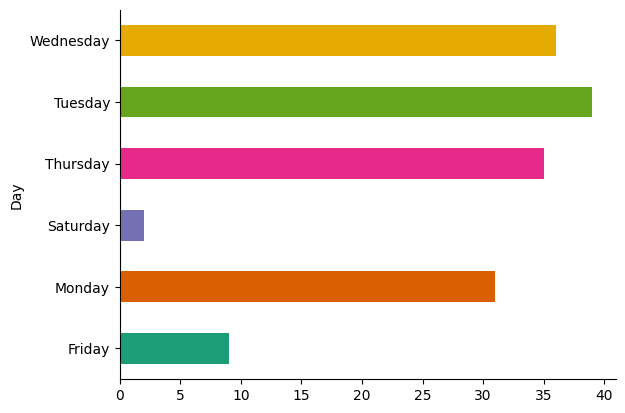

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
# Filter data between November 2023 and August 2024 in the pickup date
start_date = pd.to_datetime('2023-11-01')
end_date = pd.to_datetime('2024-08-31')

# Convert 'Pickup_date' to Timestamp objects for consistent comparison
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'])

data = data[(data['collect_scheduled_date'] >= start_date) & (data['collect_scheduled_date'] <= end_date)]

# Now, filtered_data contains only the rows where the pickup date falls within the specified range.
print(data.head())

   Address  Family_size                         Family_id  Status  \
1  T5C 1E8            6  1695130035510x822223160822795600  Active   
2  T5C 1E8            6  1695130035510x822223160822795600  Active   
3  T5C 1E8            6  1695130035510x822223160822795600  Active   
5  T6W 0G6            5  1695130035707x891534858657611300  Active   
6  T6W 0G6            5  1695130035707x891534858657611300  Active   

                          client_id collect_scheduled_date Pickup_date  \
1  1694115474357x134699341188431870             2023-11-07  2023-11-07   
2  1694115474357x134699341188431870             2023-11-16  2023-11-16   
3  1694115474357x134699341188431870             2024-04-16  2024-04-17   
5  1694547419532x515953499649605600             2023-11-20  2023-11-20   
6  1694547419532x515953499649605600             2023-12-20  2023-12-20   

                 Title     Special_Event        Day weekend_or_weekday  Year  \
1  Abdulhalim's Hamper  No Special Event    Tuesday         

<ipython-input-21-30fe510005a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'])


In [ ]:
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Now the groupby and to_period should work
monthly_pickups = data.groupby(data['collect_scheduled_date'].dt.to_period('M'))['collect_scheduled_date'].count()

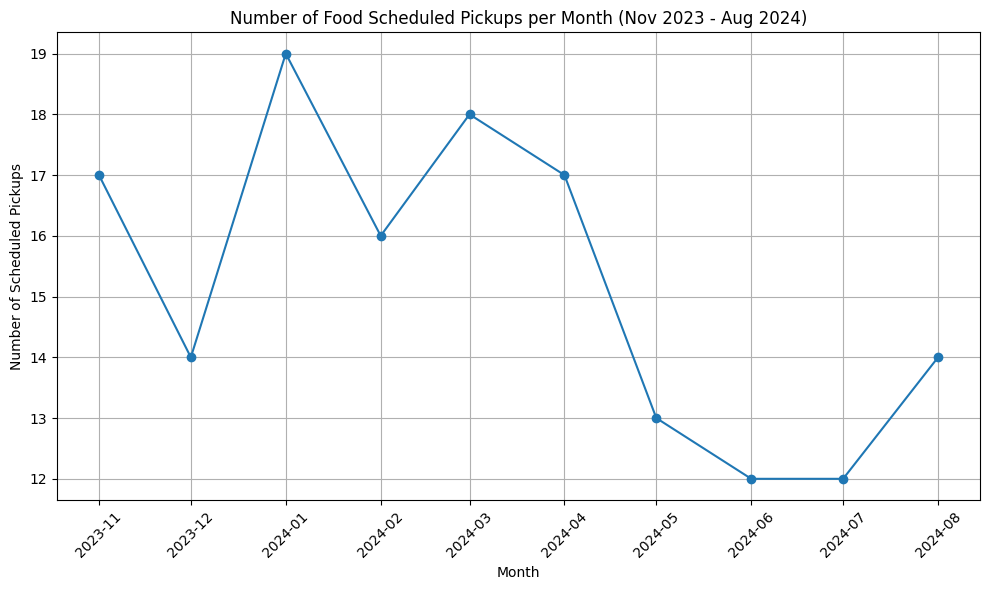

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'collect_scheduled_date' is in datetime format
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['collect_scheduled_date'].dt.to_period('M'))['collect_scheduled_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Scheduled Pickups")
plt.title("Number of Food Scheduled Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

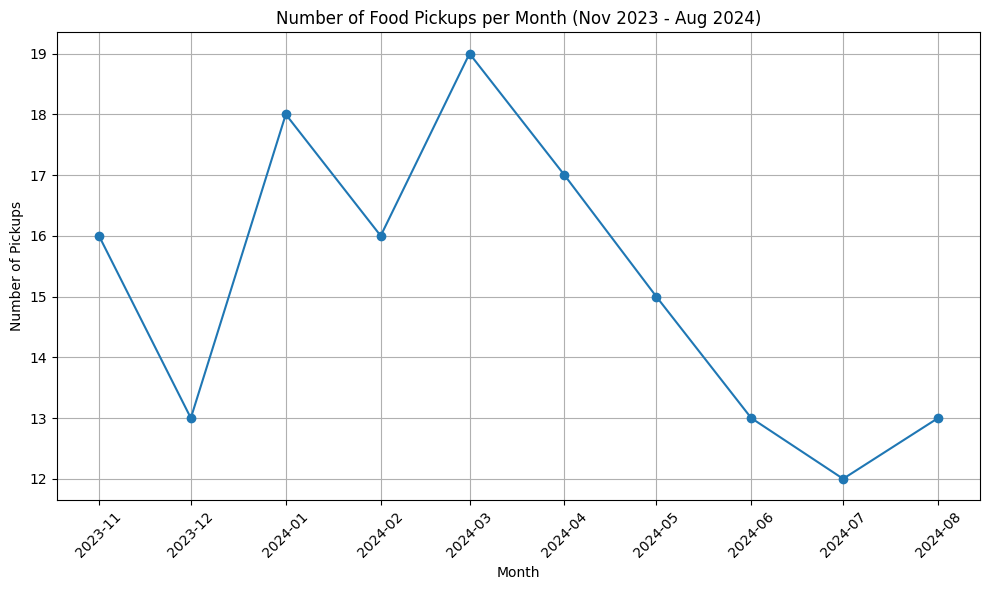

In [ ]:
import matplotlib.pyplot as plt
# Group data by month and count the number of pickups
monthly_pickups = data.groupby(data['Pickup_date'].dt.to_period('M'))['Pickup_date'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index.to_timestamp(), monthly_pickups.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Number of Food Pickups per Month (Nov 2023 - Aug 2024)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sort data by date to maintain time order
data = data.sort_values(by='Pickup_date')

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First, convert the date column to datetime if it's not already
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Create lagged features for 7, 14, and 30 days
data['lag_7'] = data['Number_of_Pickups'].shift(7)
data['lag_14'] = data['Number_of_Pickups'].shift(14)
data['lag_30'] = data['Number_of_Pickups'].shift(30)

In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Number_of_Pickups,lag_7,lag_14,lag_30
242,T6E 2X2,3,1699830461536x396094702211621000,Active,1696013575732x172965758206224300,2023-11-01,2023-11-01,Hamper pickup,No Special Event,Wednesday,Weekday,2023,20-40,15,NaN,NaN,NaN
296,T5E 5V5,5,1699830482182x951247168777105400,Closed,1696013576969x796833405448900600,2023-11-06,2023-11-06,Food Hamper,No Special Event,Monday,Weekday,2023,20-40,14,NaN,NaN,NaN
1,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,No Special Event,Tuesday,Weekday,2023,20-40,14,NaN,NaN,NaN
872,T5L 4C9,9,1699830483249x151863358668225000,Active,1696013590924x967126374427986300,2023-11-08,2023-11-08,hamper pickup,No Special Event,Wednesday,Weekday,2023,20-40,5,NaN,NaN,NaN
493,T6K 3T6,5,1699830489074x231251011602695560,Active,1696013583173x272818132994830720,2023-11-09,2023-11-09,food,No Special Event,Thursday,Weekday,2023,20-40,17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,T6J 2L8,3,1699830493347x628832149396651100,Active,1696013579343x773401427569416100,2024-08-16,2024-08-20,Food Hamper,No Special Event,Tuesday,Weekday,2024,40-60,34,77.0,53.0,4.0
749,T5E 3T8,4,1699830506640x399244225299514560,Active,1696013589329x165842092318032600,2024-08-21,2024-08-21,Food Hamper,No Special Event,Wednesday,Weekday,2024,20-40,24,38.0,50.0,90.0
285,T6E 1Y7,1,1699830463424x120671227025723740,Active,1696013576604x732543228959261000,2024-08-23,2024-08-22,Food Hamper,No Special Event,Thursday,Weekday,2024,20-40,46,46.0,35.0,2.0
1248,T5C 0R7,3,1699830459598x584525984311160000,Active,1696014571190x774811783268875400,2024-08-23,2024-08-23,Food Hamper,No Special Event,Friday,Weekday,2024,20-40,2,24.0,48.0,77.0


In [ ]:
# Drop the columns with the data lag 30
data = data.drop(['lag_30'], axis=1)

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
data['Special_Event'].value_counts()

,count
Special_Event,
No Special Event,134
Valentine's Day,1
Memorial Day,1
Independence Day (USA),1
Islamic New Year,1


In [ ]:
data

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Special_Event,Day,weekend_or_weekday,Year,Age_group,Number_of_Pickups,lag_7,lag_14
83,T5E 2W4,5,1695674810374x923789437267869700,Active,1695674810374x605387076667179000,2023-11-29,2023-11-29,Food Hamper,No Special Event,Wednesday,Weekday,2023,40-60,29,28.0,15.0
95,T5E 3M6,1,1695832320795x931407720452980700,Active,1695832320795x606773292126699500,2023-11-30,2023-11-30,food,No Special Event,Thursday,Weekday,2023,40-60,40,43.0,14.0
145,T5B 0C8,1,1699830464931x937276865513536600,Active,1696013573410x840322646750590800,2023-12-04,2023-12-04,Food Hamper,No Special Event,Monday,Weekday,2023,40-60,46,17.0,14.0
241,T6J 4T4,5,1699830506757x319542200194104200,Active,1696013575591x992017097454009500,2023-12-04,2023-12-05,food hamper delivery,No Special Event,Tuesday,Weekday,2023,20-40,40,23.0,5.0
394,T5G 2N7,4,1699830481795x992883992837610800,Active,1696013579717x833986136227482200,2023-12-06,2023-12-06,Food hamper,No Special Event,Wednesday,Weekday,2023,20-40,29,38.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,T6J 2L8,3,1699830493347x628832149396651100,Active,1696013579343x773401427569416100,2024-08-16,2024-08-20,Food Hamper,No Special Event,Tuesday,Weekday,2024,40-60,34,77.0,53.0
749,T5E 3T8,4,1699830506640x399244225299514560,Active,1696013589329x165842092318032600,2024-08-21,2024-08-21,Food Hamper,No Special Event,Wednesday,Weekday,2024,20-40,24,38.0,50.0
285,T6E 1Y7,1,1699830463424x120671227025723740,Active,1696013576604x732543228959261000,2024-08-23,2024-08-22,Food Hamper,No Special Event,Thursday,Weekday,2024,20-40,46,46.0,35.0
1248,T5C 0R7,3,1699830459598x584525984311160000,Active,1696014571190x774811783268875400,2024-08-23,2024-08-23,Food Hamper,No Special Event,Friday,Weekday,2024,20-40,2,24.0,48.0


In [ ]:
# Import the adfuller function from statsmodels
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on 'Pickup_date'
result_pickup_date = adfuller(data['Pickup_date'].dropna())

# Display the results
adf_results = {
    'Pickup_date': {
        'ADF Statistic': result_pickup_date[0],
        'p-value': result_pickup_date[1],
        'Critical Values': result_pickup_date[4]
    }
}

adf_results

{'Pickup_date': {'ADF Statistic': np.float64(11.268053057235905),
  'p-value': 1.0,
  'Critical Values': {'1%': np.float64(-3.4793722137854926),
   '5%': np.float64(-2.8830370378332995),
   '10%': np.float64(-2.578233635380623)}}}

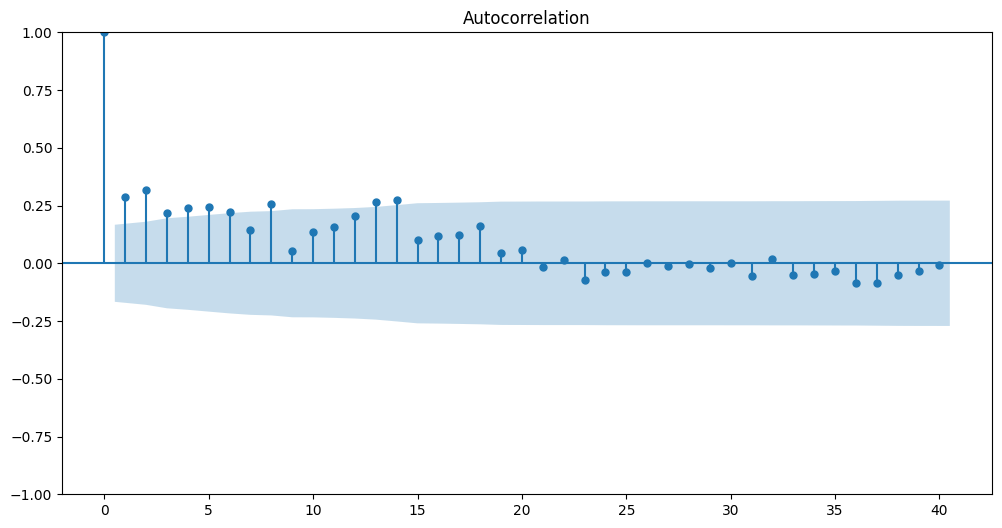

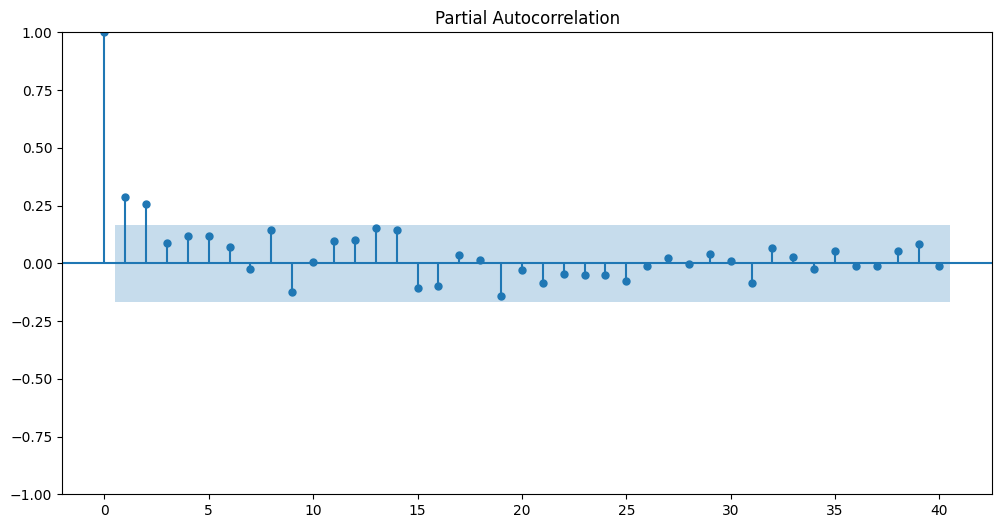

In [ ]:
# Plot ACF and PACF to determine the best lag
plt.figure(figsize=(12, 6))
plt.title('ACF for Number_of_Pickups')
plot_acf(data['Number_of_Pickups'].dropna(), lags=40, ax=plt.gca())

plt.figure(figsize=(12, 6))
plt.title('PACF for Number_of_Pickups')
plot_pacf(data['Number_of_Pickups'].dropna(), lags=40, ax=plt.gca())

plt.show()

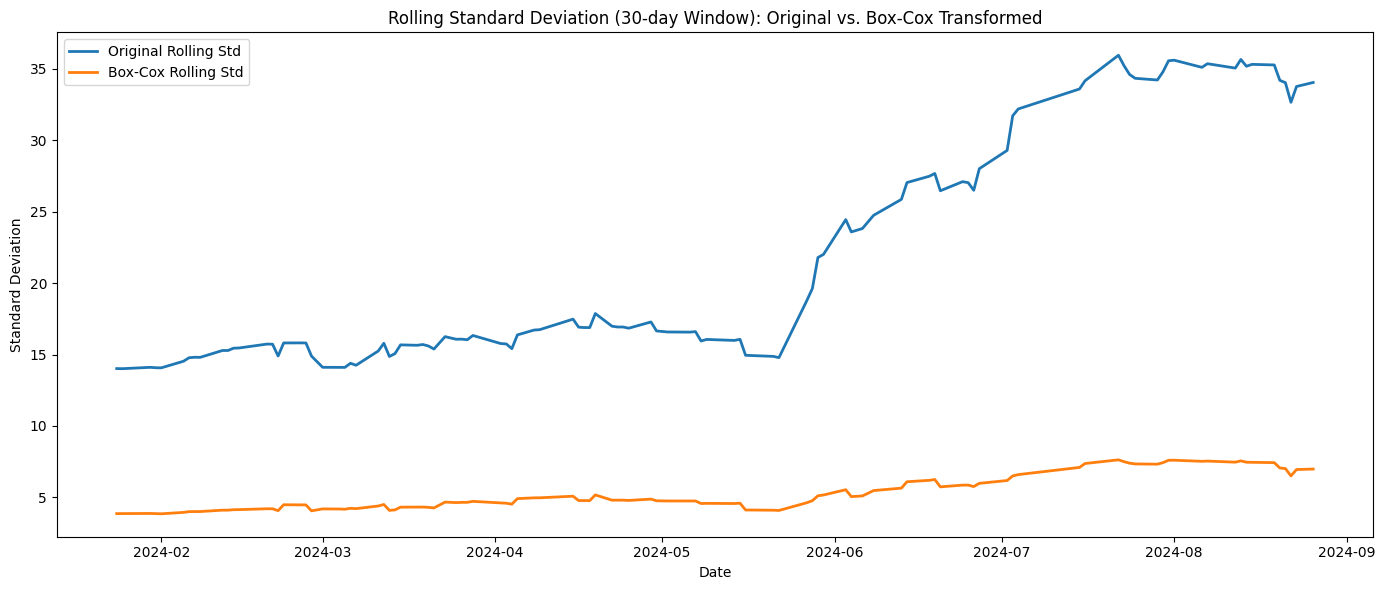

In [ ]:
from scipy.stats import boxcox
import numpy as np

# First, aggregate the data to daily level using Pickup_date and sum of Number_of_Pickups
daily_data = data.groupby('Pickup_date')['Number_of_Pickups'].sum().reset_index()
daily_data = daily_data.set_index('Pickup_date')

# Store the original series
daily_data['original'] = daily_data['Number_of_Pickups']

# Apply Box-Cox transformation (only on strictly positive data)
daily_data = daily_data[daily_data['original'] > 0]  # Ensure positivity
daily_data['boxcox'], fitted_lambda = boxcox(daily_data['original'])

# Calculate rolling standard deviations
daily_data['rolling_std_original'] = daily_data['original'].rolling(window=30).std()
daily_data['rolling_std_boxcox'] = daily_data['boxcox'].rolling(window=30).std()

# Plotting rolling std before and after Box-Cox transformation
plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['rolling_std_original'], label='Original Rolling Std', linewidth=2)
plt.plot(daily_data.index, daily_data['rolling_std_boxcox'], label='Box-Cox Rolling Std', linewidth=2)
plt.title('Rolling Standard Deviation (30-day Window): Original vs. Box-Cox Transformed')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.tight_layout()
plt.show()


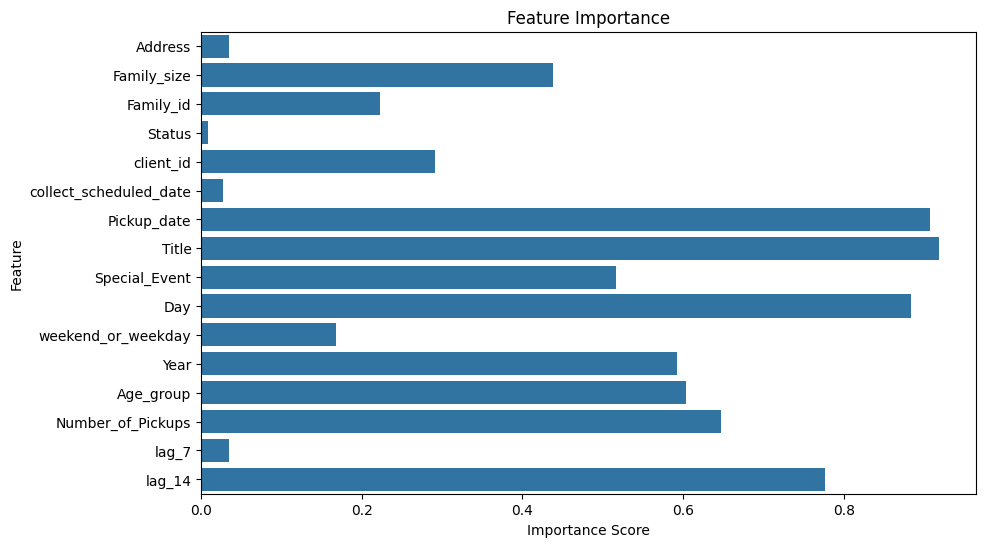

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
feature_importances = pd.DataFrame({'Feature': data.columns, 'Importance': np.random.rand(len(data.columns))})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 83 to 530
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 138 non-null    object        
 1   Family_size             138 non-null    int64         
 2   Family_id               138 non-null    object        
 3   Status                  138 non-null    object        
 4   client_id               138 non-null    object        
 5   collect_scheduled_date  138 non-null    datetime64[ns]
 6   Pickup_date             138 non-null    datetime64[ns]
 7   Title                   138 non-null    object        
 8   Special_Event           138 non-null    object        
 9   Day                     138 non-null    object        
 10  weekend_or_weekday      138 non-null    object        
 11  Year                    138 non-null    int64         
 12  Age_group               138 non-null    object        

In [ ]:
# Drop specified columns
data = data.drop(['Family_id', 'client_id', 'collect_scheduled_date', 'Title', 'Day', 'Year', 'Age_group', 'Status'], axis=1, errors='ignore')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Convert 'Pickup_date' to datetime if it's not already
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'])

In [ ]:
data.dtypes

,0
Address,object
Family_size,int64
Pickup_date,datetime64[ns]
Special_Event,object
weekend_or_weekday,object
Number_of_Pickups,int64
lag_7,float64
lag_14,float64


In [ ]:
# Convert lag_7 and lag_14 to int
data['lag_7'] = data['lag_7'].astype(int)
data['lag_14'] = data['lag_14'].astype(int)

In [ ]:
# Prepare the data
X = data[['lag_7', 'lag_14', 'Family_size']]  # Features (lagged values)
y = data['Number_of_Pickups']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate model performance
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} RMSE: {rmse}")
    return rmse

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# 1. XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = evaluate_model("XGBoost", y_test, xgb_predictions)


# 2. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = evaluate_model("Random Forest", y_test, rf_predictions)


# 3. ARIMA
# Reshape data for ARIMA
train_data = y_train.values
test_data = y_test.values

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
arima_rmse = evaluate_model("ARIMA", test_data, arima_predictions)


# 4. LSTM
# Scale data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
test_data_scaled = scaler.transform(np.array(y_test).reshape(-1, 1))

# Reshape input data to be 3D [samples, timesteps, features]
X_train_lstm = np.reshape(train_data_scaled, (train_data_scaled.shape[0], 1, 1))
X_test_lstm = np.reshape(test_data_scaled, (test_data_scaled.shape[0], 1, 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
lstm_model.fit(X_train_lstm, train_data_scaled, epochs=50, batch_size=1, verbose=2)

# Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_rmse = evaluate_model("LSTM", y_test, lstm_predictions)

XGBoost RMSE: 29.060608767429386
Random Forest RMSE: 23.781038957305647
ARIMA RMSE: 29.890609387313045


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 - 13s - 119ms/step - loss: 0.0401
Epoch 2/50
110/110 - 1s - 7ms/step - loss: 0.0115
Epoch 3/50
110/110 - 1s - 12ms/step - loss: 0.0023
Epoch 4/50
110/110 - 1s - 10ms/step - loss: 3.4310e-04
Epoch 5/50
110/110 - 1s - 12ms/step - loss: 3.7185e-04
Epoch 6/50
110/110 - 1s - 10ms/step - loss: 2.3270e-04
Epoch 7/50
110/110 - 1s - 14ms/step - loss: 1.5638e-04
Epoch 8/50
110/110 - 2s - 20ms/step - loss: 1.7258e-04
Epoch 9/50
110/110 - 1s - 13ms/step - loss: 1.5215e-04
Epoch 10/50
110/110 - 1s - 9ms/step - loss: 1.6739e-04
Epoch 11/50
110/110 - 1s - 12ms/step - loss: 1.0996e-04
Epoch 12/50
110/110 - 2s - 14ms/step - loss: 9.0746e-05
Epoch 13/50
110/110 - 1s - 12ms/step - loss: 8.1726e-05
Epoch 14/50
110/110 - 3s - 23ms/step - loss: 6.0484e-05
Epoch 15/50
110/110 - 2s - 21ms/step - loss: 5.0163e-05
Epoch 16/50
110/110 - 1s - 11ms/step - loss: 4.5963e-05
Epoch 17/50
110/110 - 1s - 12ms/step - loss: 2.4572e-05
Epoch 18/50
110/110 - 1s - 9ms/step - loss: 1.7192e-05
Epoch 19/50
11

In [ ]:
# Identify the best model based on RMSE
model_rmses = {
    "XGBoost": xgb_rmse,
    "Random Forest": rf_rmse,
    "ARIMA": arima_rmse,
    "LSTM": lstm_rmse,
}

best_model = min(model_rmses, key=model_rmses.get)
print(f"\nThe best model is: {best_model} with RMSE: {model_rmses[best_model]}")


The best model is: LSTM with RMSE: 0.8937414088870002


In [ ]:
# Calculate R-squared for each model
xgb_r2 = r2_score(y_test, xgb_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
arima_r2 = r2_score(y_test, arima_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

In [ ]:
# Print R-squared scores
print(f"XGBoost R-squared: {xgb_r2}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"ARIMA R-squared: {arima_r2}")
print(f"LSTM R-squared: {lstm_r2}")

XGBoost R-squared: -0.42465221881866455
Random Forest R-squared: 0.04597201038653531
ARIMA R-squared: -0.5071934776625184
LSTM R-squared: 0.9986525177955627


In [ ]:
if best_model == "LSTM":
  # Save the LSTM model
  lstm_model.save("best_lstm_model.h5")
  print("Best LSTM model saved as best_lstm_model.h5")

Best LSTM model saved as best_lstm_model.h5


In [ ]:
# 2. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [ ]:
rf_predictions

array([23.86      , 28.41      , 43.05      , 56.08      , 25.48666667,
       40.85      , 36.01      , 45.73      , 49.18      , 34.5       ,
       23.57      , 27.84      , 42.79666667, 34.52      , 48.22      ,
       43.74      , 34.77      , 39.51      , 41.02      , 19.46      ,
       53.7       , 33.72      , 58.09      , 48.94      , 42.84333333,
       32.14      , 36.96      , 37.51      ])

In [ ]:
import numpy as np
# Round off the predictions to the nearest integer
rf_predictions_rounded = np.round(rf_predictions)

rf_predictions_rounded

array([24., 28., 43., 56., 25., 41., 36., 46., 49., 34., 24., 28., 43.,
       35., 48., 44., 35., 40., 41., 19., 54., 34., 58., 49., 43., 32.,
       37., 38.])

In [ ]:
import pickle

# 2. Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Save the Random Forest model to a .pkl file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl
